In [1]:
import matplotlib
matplotlib.use('agg')
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print(tf.__version__)

1.3.0


In [4]:
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader

## Prepare data

In [5]:
X = np.array(range(1000))
noise = np.random.uniform(-0.2, 0.2, 1000)
y = np.sin(np.pi * X / 100) + X / 200. + noise

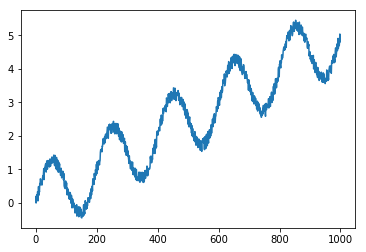

In [6]:
plt.plot(X, y)
plt.savefig("img/timeseries_y.jpg")

In [24]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: X,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
# same
data = {'times':X, 'values': y}

In [25]:
reader = NumpyReader(data)

## Train

In [26]:
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader,
                                                           batch_size=16,
                                                           window_size=40)
ar = tf.contrib.timeseries.ARRegressor(periodicities=200,
                                       input_window_size=30,
                                       output_window_size=10,
                                       num_features=1,
                                       loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\wuht\\AppData\\Local\\Temp\\tmpgqwvsq_o', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\wuht\AppData\Local\Temp\tmpgqwvsq_o\model.ckpt.
INFO:tensorflow:loss = 1.64674, step = 1
INFO:tensorflow:global_step/sec: 564.979
INFO:tensorflow:loss = 0.521109, step = 101 (0.177 sec)
INFO:tensorflow:global_step/sec: 789.895
INFO:tensorflow:loss = -0.0132996, step = 201 (0.131 sec)
INFO:tensorflow:global_step/sec: 624.226
INFO:tensorflow:loss = -0.0704548, step = 301 (0.156 sec)
INFO:tensorflow:global_step/sec: 754.149
INFO:tensorflow:loss = -0.289699, step = 401 (0.135 sec)
INFO:tensorflow:global_step/sec: 618.816
INFO

## Evaluation

In [27]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
# keys of evaluation: ['covariance', 'loss', 'mean', 'observed', 'start_tuple', 'times', 'global_step']
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2017-10-04-02:28:30
INFO:tensorflow:Restoring parameters from C:\Users\wuht\AppData\Local\Temp\tmpgqwvsq_o\model.ckpt-6000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-10-04-02:28:31
INFO:tensorflow:Saving dict for global step 6000: covariance = [[[ 0.01099692]
  [ 0.01240572]
  [ 0.01543412]
  [ 0.0110674 ]
  [ 0.01890916]
  [ 0.01647445]
  [ 0.01689661]
  [ 0.01809485]
  [ 0.01726086]
  [ 0.01203291]
  [ 0.01222138]
  [ 0.01548319]
  [ 0.01588966]
  [ 0.01722091]
  [ 0.02013317]
  [ 0.01396547]
  [ 0.02006302]
  [ 0.01993768]
  [ 0.01706149]
  [ 0.01402768]
  [ 0.01114414]
  [ 0.01199115]
  [ 0.01415172]
  [ 0.01550498]
  [ 0.03766583]
  [ 0.01326116]
  [ 0.01674292]
  [ 0.01306599]
  [ 0.0155454 ]
  [ 0.01257616]
  [ 0.01517209]
  [ 0.01224512]
  [ 0.01099707]
  [ 0.01062748]
  [ 0.0116253 ]
  [ 0.0170974 ]
  [ 0.02265447]
  [ 0.01599368]
  [ 0.01855122]
  [ 0.01533709]
  [ 0.01716013]
  [ 0.02022013]
  [ 0.01857

In [28]:
(predictions,)  = tuple(ar.predict(input_fn=tf.contrib.timeseries.predict_continuation_input_fn(evaluation,
                                                                                                steps=250)))

INFO:tensorflow:Restoring parameters from C:\Users\wuht\AppData\Local\Temp\tmpgqwvsq_o\model.ckpt-6000


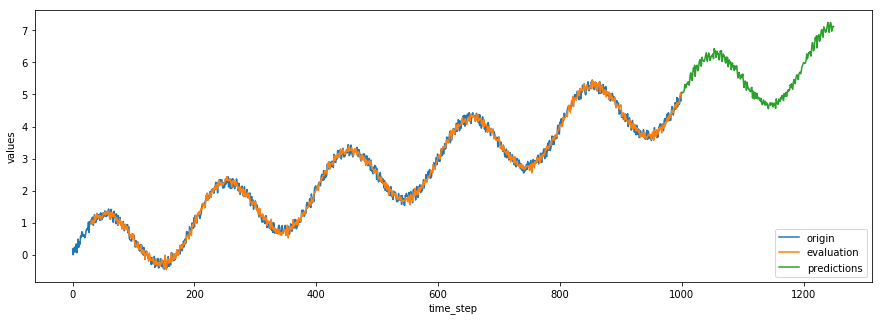

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(data['times'].reshape(-1), data["values"].reshape(-1), label="origin")
plt.plot(evaluation["times"].reshape(-1), evaluation["mean"].reshape(-1), label="evaluation")
plt.plot(predictions["times"].reshape(-1), predictions["mean"].reshape(-1), label="predictions")
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend(loc=4)
plt.savefig("img/predict_result.jpg")